In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def read_bin(filename,N):
	with open(filename, 'rb') as f:
		data = np.fromfile(f, dtype=np.int32)

	data = data.reshape((N, N))
	return data

def segment_time(t_0,t_max):
	bins= np.arange(0,t_max+1,t_0)
	segments = []
	for i in range(len(bins)):
		segments.append(bins[i:i+2])
	return segments[:-1]

def linear_map(input_range, output_range, value):
    (input_min, input_max) = input_range
    (output_min, output_max) = output_range

    # Calculate the slope and y-intercept of the linear function
    slope = (output_max - output_min) / (input_max - input_min)
    y_intercept = output_min - slope * input_min

    # Return the mapped value
    return slope * value + y_intercept

In [2]:
data=[]
data_folder = 'datos'
config=np.genfromtxt(data_folder+'/config.csv', delimiter=',', skip_header=0)
N=int(config[0])
t_max=int(config[1])
for i in range(t_max):
	# print(i)
	data.append(
		read_bin(data_folder+'/datos'+str(i)+'.bin',N)
		)

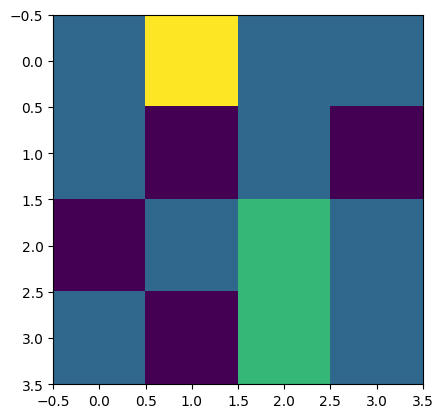

In [4]:
plt.imshow(data[-1])

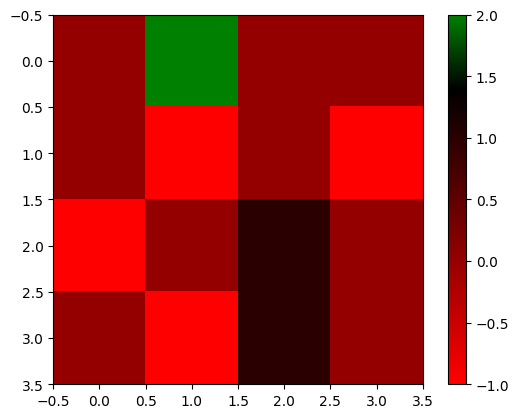

In [16]:
from matplotlib.colors import LinearSegmentedColormap, Normalize



max_val=np.max(data[-1])
min_val=np.min(data[-1])
linear_map((-1,max_val),(0,1),0)

colors = ["red", "black", "green"]

values = [0, 0.8, 1]  # these are the values at which the colors change

# Create colormap
cmap = LinearSegmentedColormap.from_list("my_colormap", list(zip(values, colors)))

# Normalize your data to match the range of your colormap
norm = Normalize(vmin=-1, vmax=max_val)

# Use colormap and normalization in your plot
plt.imshow(data[-1], cmap=cmap, norm=norm)
plt.colorbar()
plt.show()